# Introduction to Multiple Linear Regression

Linear regression is useful when we want to predict the values of a variable from its relationship with other variables. There are two different types of linear regression models (simple linear regression and multiple linear regression).

In predicting the price of a home, one factor to consider is the size of the home. The relationship between those two variables, price and size, is important, but there are other variables that factor in to pricing a home: location, air quality, demographics, parking, and more. When making predictions for price, our dependent variable, we’ll want to use multiple independent variables. To do this, we’ll use Multiple Linear Regression.

Multiple Linear Regression uses two or more independent variables to predict the values of the dependent variable. It is based on the following equation that we’ll explore later on:

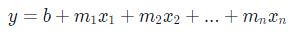

C:\Users\ezque\AppData\Local\Temp\ipykernel_20868\3192819145.py:31: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=elev, azim=azim)
d:\Documentos\Codecademy\MachineLearningEngineer\MLEngineerCourse.env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


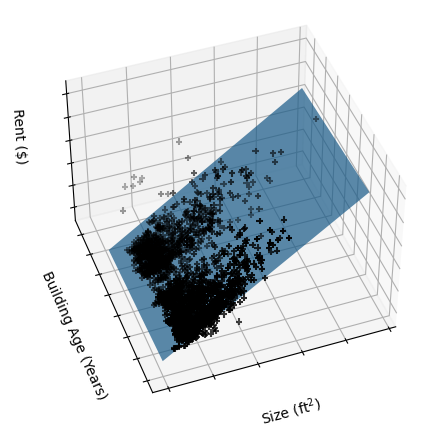

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

streeteasy = pd.read_csv("manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['size_sqft','building_age_yrs']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

ols = LinearRegression()

ols.fit(x_train, y_train)

# Plot the figure

fig = plt.figure(1, figsize=(6, 4))
plt.clf()

elev = 43.5
azim = -110

ax = Axes3D(fig, elev=elev, azim=azim)

ax.scatter(x_train[['size_sqft']], x_train[['building_age_yrs']], y_train, c='k', marker='+')

ax.plot_surface(np.array([[0, 0], [4500, 4500]]), np.array([[0, 140], [0, 140]]), ols.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)), alpha=.7)

ax.set_xlabel('Size (ft$^2$)')
ax.set_ylabel('Building Age (Years)')
ax.set_zlabel('Rent ($)')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Add the code below:
plt.show()

**StreetEasy** is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

In this lesson, you will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

It has the following columns:

rental_id: rental ID
rent: price of rent in dollars
bedrooms: number of bedrooms
bathrooms: number of bathrooms
size_sqft: size in square feet
min_to_subway: distance from subway station in minutes
floor: floor number
building_age_yrs: building’s age in years
no_fee: does it have a broker fee? (0 for fee, 1 for no fee)
has_roofdeck: does it have a roof deck? (0 for no, 1 for yes)
has_washer_dryer: does it have washer/dryer in unit? (0/1)
has_doorman: does it have a doorman? (0/1)
has_elevator: does it have an elevator? (0/1)
has_dishwasher: does it have a dishwasher (0/1)
has_patio: does it have a patio? (0/1)
has_gym: does the building have a gym? (0/1)
neighborhood: (ex: Greenpoint)
borough: (ex: Brooklyn)
More information about this dataset can be found in the StreetEasy Dataset article.

Let’s start by doing exploratory data analysis to understand the dataset better. We have broken the dataset for you into:

manhattan.csv
brooklyn.csv
queens.csv


In [3]:
df = pd.read_csv("brooklyn.csv")

In [4]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2869,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1,4318,3900,3.0,2,1000,4,9.0,8,0,0,0,0,1,0,0,0,Greenwood,Brooklyn
2,6265,2700,2.0,1,900,4,2.0,96,0,0,0,0,0,0,0,0,Gowanus,Brooklyn
3,24,4900,1.0,1,1216,6,3.0,88,0,0,0,0,0,0,0,0,Brooklyn Heights,Brooklyn
4,9481,3900,0.0,1,1100,3,4.0,85,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn


In [5]:
import pandas as pd

from sklearn.model_selection import train_test_split

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

In [6]:
x = df[['bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']]
y = df.rent

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

In [8]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831,)
(708,)


In [9]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(x_train,y_train)

LinearRegression()

In [10]:
y_predict = mlr.predict(x_test)

In [11]:
# Sonny doesn't have an elevator so the 11th item in the list is a 0
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


d:\Documentos\Codecademy\MachineLearningEngineer\MLEngineerCourse.env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ezque\AppData\Local\Temp\ipykernel_20868\2360895695.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted rent: $%.2f" % predict)


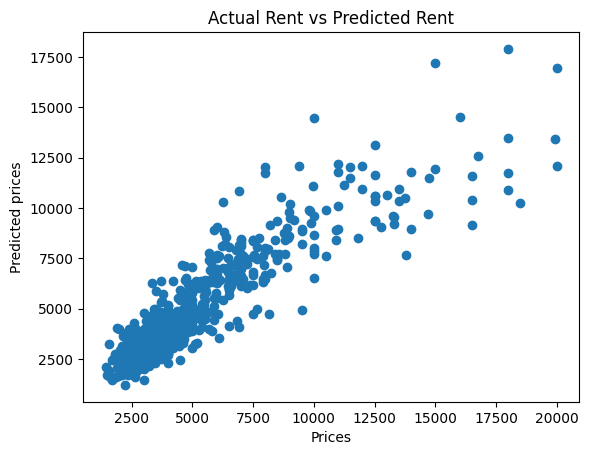

In [12]:
plt.scatter(y_test, y_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

In [13]:
print(mlr.coef_)

[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
   -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
   89.408889    -57.89714551  -19.31948556  -38.92369828]


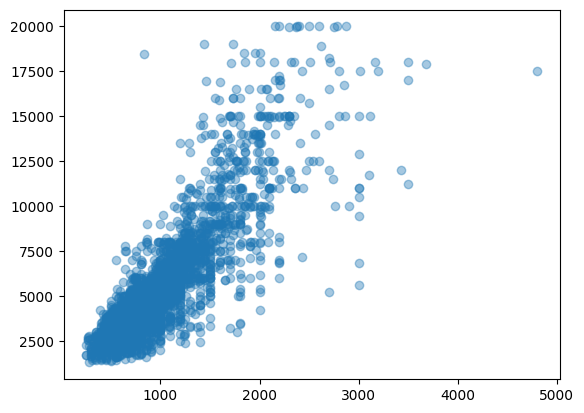

In [14]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)

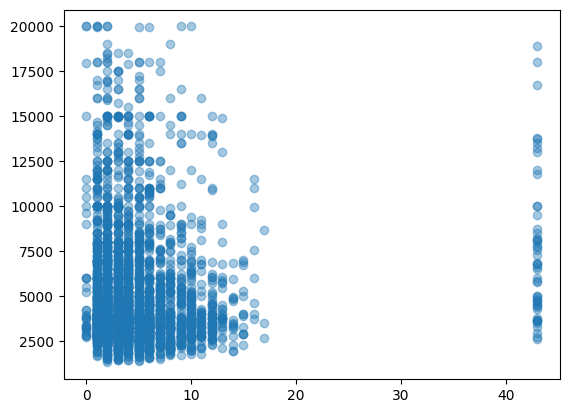

In [15]:
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)


## Evaluating the Model's Accuracy

When trying to evaluate the accuracy of our multiple linear regression model, one technique we can use is Residual Analysis.

The difference between the actual value y, and the predicted value ŷ is the residual e. The equation is:


​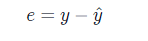
 
In the StreetEasy dataset, y is the actual rent and the ŷ is the predicted rent. The real y values should be pretty close to these predicted y values.

sklearn‘s linear_model.LinearRegression comes with a .score() method that returns the coefficient of determination R² of the prediction.

The coefficient R² is defined as:

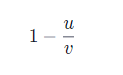
 
where u is the residual sum of squares:

((y - y_predict) ** 2).sum()

and v is the total sum of squares (TSS):

((y - y.mean()) ** 2).sum()

The TSS tells you how much variation there is in the y variable.

R² is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).

Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.

In [20]:
print(f'Train score: {mlr.score(x_train,y_train)}')
print(f'Test score: {mlr.score(x_test,y_test)}')

Train score: 0.7725460559817883
Test score: 0.8050371975357623


Train score:
0.6132214537979526
Test score:
0.5843499238725693


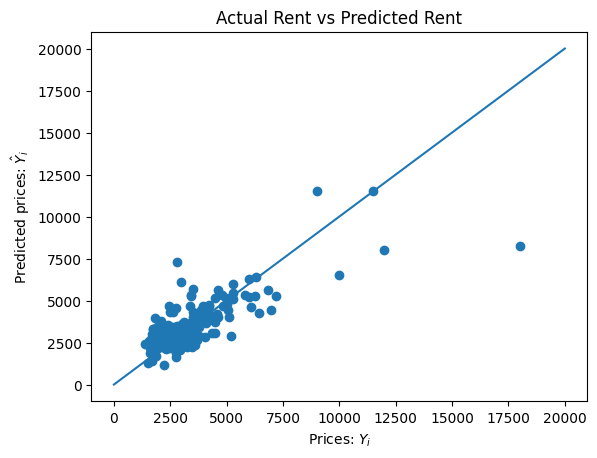

[[-196.67177625  785.40073377    2.94579148  -37.78690683   13.01784892
    -4.10092423  123.089506     99.61520874  -14.55629062 -330.26816471
    85.07118067  -11.78666927  260.68383056  396.24793842]]


In [25]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/brooklyn.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

print(lm.coef_)


## Project Tennis Ace

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("tennis_stats.csv")
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


In [4]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [55]:
import itertools

columns_to_plot = ['FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking']


# Group into pairs
pairs = list(itertools.permutations(columns_to_plot,2))
pairs = list(pd.Series([tupla if tupla[0]=='Winnings' else None for tupla in pairs]).dropna())


In [57]:
pairs.append(('Winnings','Winnings'))
len(pairs)

22

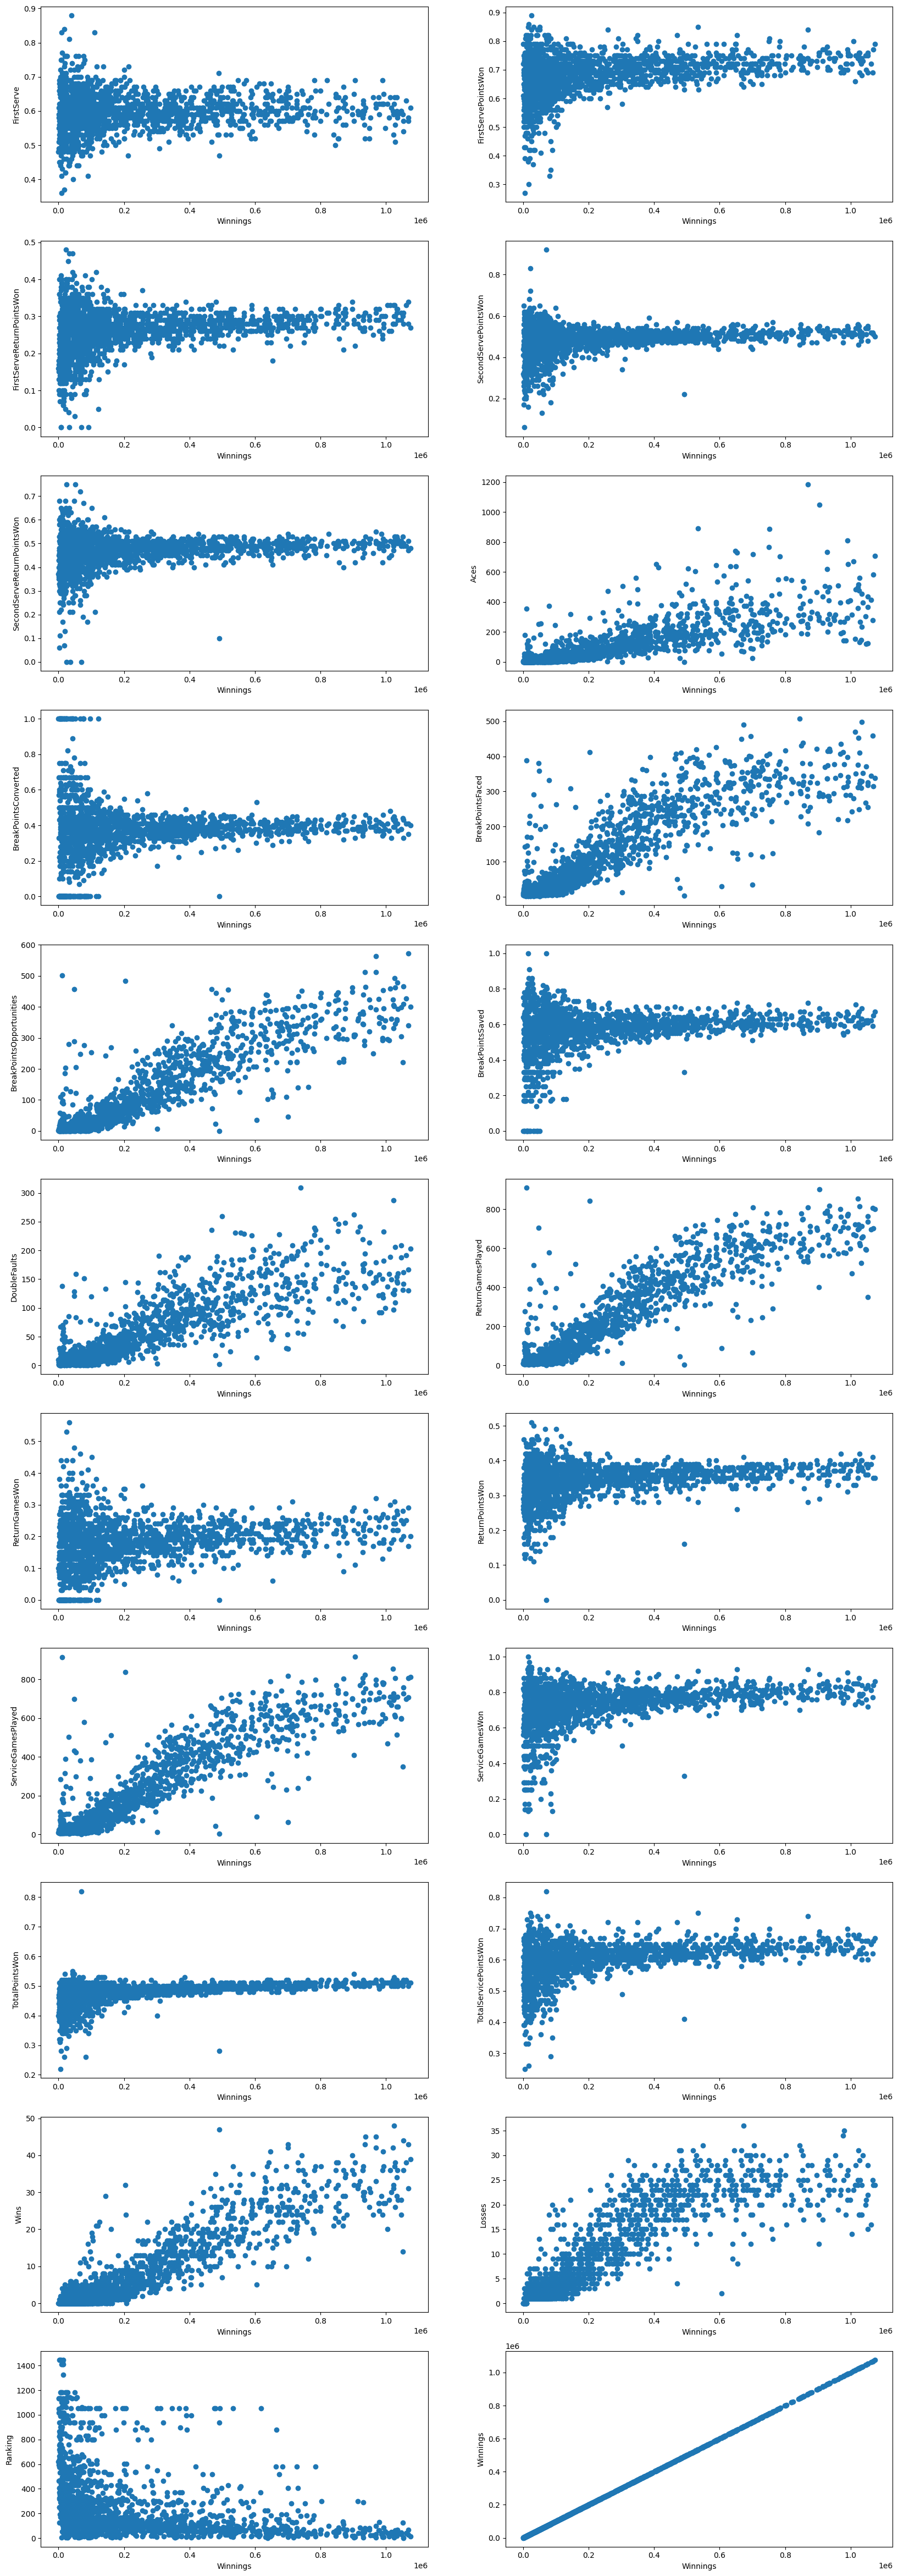

In [60]:


fig, ax = plt.subplots(11,2, figsize=(20,60))

i=0
for j in range(11):
    for k in range(2):
       ax[j][k].scatter(df[pairs[i][0]],df[pairs[i][1]])
       ax[j][k].set_xlabel(pairs[i][0])
       ax[j][k].set_ylabel(pairs[i][1])
       i+=1


# ax[0][0].scatter(df[pairs[0][0]],df[pairs[0][1]])

plt.show()


Train score: 0.8456987414862788
Test score: 0.8804127566707716


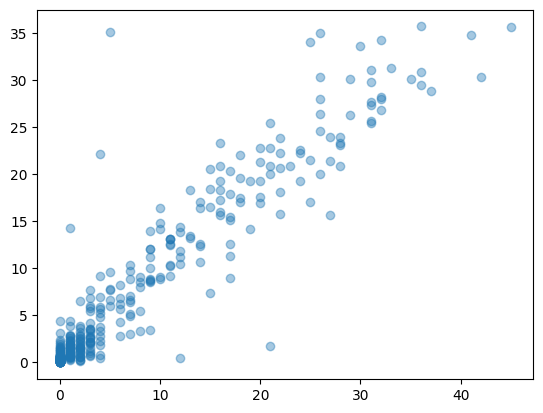

In [29]:
features = df[['BreakPointsOpportunities']]
outcome = df[['Wins']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

model = LinearRegression()
model.fit(features_train,outcome_train)

print(f"Train score: {model.score(features_train,outcome_train)}")
print(f"Test score: {model.score(features_test,outcome_test)}")

prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.show()

Train score: 0.7026610307956906
Test score: 0.5997860065177842


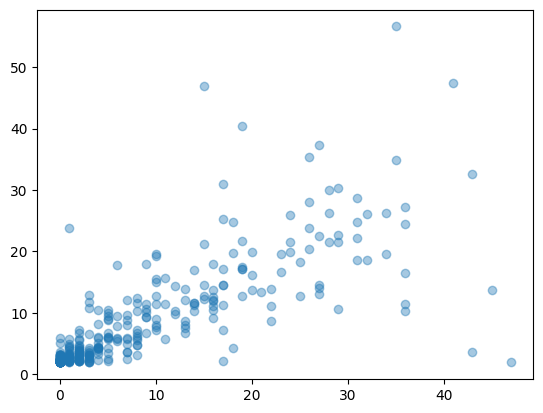

In [31]:
features = df[['Aces']]
outcome = df[['Wins']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

model = LinearRegression()
model.fit(features_train,outcome_train)

print(f"Train score: {model.score(features_train,outcome_train)}")
print(f"Test score: {model.score(features_test,outcome_test)}")

prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.show()

Train score: 0.05154779109013563
Test score: 0.07707760232795458


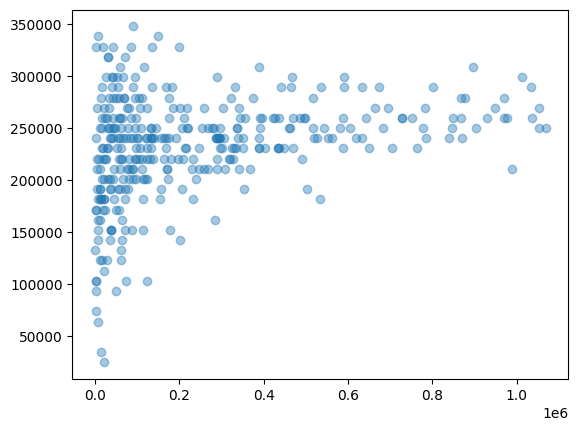

In [33]:
features = df[['FirstServeReturnPointsWon']]
outcome = df[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

model = LinearRegression()
model.fit(features_train,outcome_train)

print(f"Train score: {model.score(features_train,outcome_train)}")
print(f"Test score: {model.score(features_test,outcome_test)}")

prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.show()

Train score: 0.8354293848660735
Test score: 0.8204595479075125


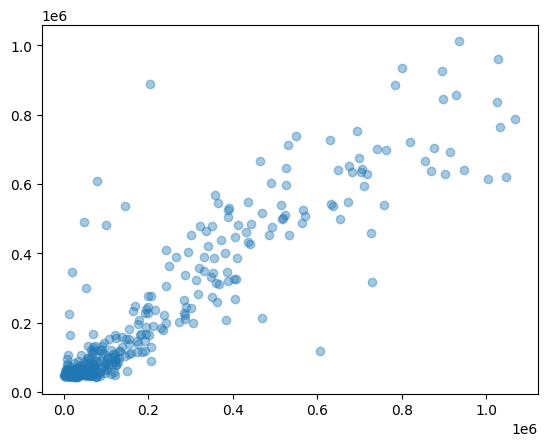

In [35]:
features = df[['BreakPointsOpportunities','Aces']]
outcome = df[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

model = LinearRegression()
model.fit(features_train,outcome_train)

print(f"Train score: {model.score(features_train,outcome_train)}")
print(f"Test score: {model.score(features_test,outcome_test)}")

prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.show()

Train score: 0.8339608697028279
Test score: 0.8501252230381189


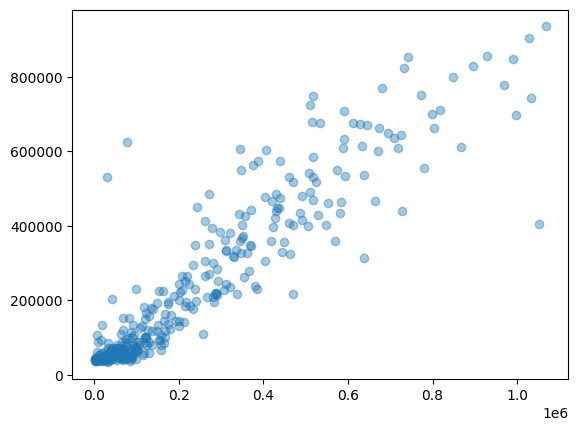

In [61]:
features = df[['BreakPointsOpportunities','Aces','ServiceGamesPlayed','ReturnGamesPlayed']]
outcome = df[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

model = LinearRegression()
model.fit(features_train,outcome_train)

print(f"Train score: {model.score(features_train,outcome_train)}")
print(f"Test score: {model.score(features_test,outcome_test)}")

prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.show()